In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('before_fe3.csv')

In [3]:
df

,daysOnMarket,price,zip,beds,baths,latitude,longitude,hasVideo,PhotosNum,Number of Households,...,borough_Staten Island,propertyType_condo,propertyType_coop,propertyType_house,propertyType_rental,propertyType_townhouse,street_number,year_available,month_available,day_available
0,1.0,1855.0,11212,1,1.0,40.662186,-73.922293,1,4,32091.0,...,0,0,0,0,1,0,171.0,2024,11,25
1,4.0,2235.0,11212,2,1.0,40.663817,-73.924122,1,5,32091.0,...,0,0,0,0,1,0,93.0,2024,11,22
2,4.0,1750.0,11212,1,1.0,40.668506,-73.917055,1,7,32091.0,...,0,0,0,0,1,0,501.0,2024,11,22
3,6.0,1850.0,11212,1,1.0,40.657349,-73.917750,1,4,32091.0,...,0,0,0,0,1,0,1115.0,2024,11,20
4,7.0,3000.0,11212,3,1.0,40.659825,-73.922602,1,9,32091.0,...,0,0,0,0,1,0,1075.0,2024,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,4070.0,10459,4,1.0,40.823948,-73.889854,0,0,17805.0,...,0,0,0,0,0,0,1027.0,2024,11,15
6967,6.0,3800.0,10307,3,3.0,40.513058,-74.249470,0,18,5217.0,...,1,0,0,0,0,0,80.0,2024,11,15
6968,5.0,3750.0,10038,2,1.0,40.709580,-74.009330,0,5,10646.0,...,0,0,0,0,0,0,11.0,2024,11,15
6969,10.0,3200.0,10038,1,1.0,40.709370,-74.006035,0,0,10646.0,...,0,0,0,0,0,0,88.0,2024,11,15


In [10]:
df.columns

Index(['daysOnMarket', 'price', 'zip', 'beds', 'baths', 'latitude',
       'longitude', 'hasVideo', 'PhotosNum', 'Number of Households',
       'Median Household Income', 'Per Capita Income',
       'Total Income Distribution', 'Median Gross Rent', 'Median Home Value',
       'Occupied Housing Units', 'Vacant Housing Units',
       'Owner-Occupied Units (value < $100,000)', 'Monthly Housing Costs',
       'Precinct', 'schools_in_precinct', 'nearby_subway_stations',
       'crime_rate', 'precinct_safety_rank', 'Median Age_ratio',
       'Male Population_ratio', 'Female Population_ratio', 'White Alone_ratio',
       'Black or African American Alone_ratio', 'Asian Alone_ratio',
       'Hispanic or Latino_ratio', 'Population Below Poverty Level_ratio',
       'Employed_ratio', 'Unemployed_ratio',
       'High School Graduate (Age 25+)_ratio',
       'Bachelor’s Degree (Age 25+)_ratio',
       'Graduate or Professional Degree (Age 25+)_ratio',
       'Never Married_ratio', 'Currently Marrie

In [5]:
housing_data = df

In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = housing_data.drop(columns=['price'], errors='ignore')  # Remove price columns if log-transformed
y = housing_data['log_price'] if 'log_price' in housing_data.columns else housing_data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing data prepared.")


Training and testing data prepared.


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
baseline_mae = mean_absolute_error(y_test, y_pred)
baseline_rmse = mean_squared_error(y_test, y_pred, squared=False)
baseline_r2 = r2_score(y_test, y_pred)

print("Baseline Model Performance:")
print(f"MAE: {baseline_mae}")
print(f"RMSE: {baseline_rmse}")
print(f"R^2: {baseline_r2}")

Baseline Model Performance:
MAE: 1952.502774748196
RMSE: 4119.797609588484
R^2: 0.5487582786132676


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Model Performance:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")

Random Forest Model Performance:
MAE: 942.3192186379929
RMSE: 2834.3443935978635
R^2: 0.7864189472214629


In [11]:
from xgboost import XGBRegressor
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_train.columns = X_train.columns.str.replace('[\[\]<]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[\[\]<]', '', regex=True)

# Train XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost Model Performance:")
print(f"MAE: {xgb_mae}")
print(f"RMSE: {xgb_rmse}")
print(f"R^2: {xgb_r2}")

XGBoost Model Performance:
MAE: 979.7486938039034
RMSE: 3072.207076099708
R^2: 0.7490666093089058


In [26]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [210,211,212],
    'max_depth': [None],
    'min_samples_split': [5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 211}


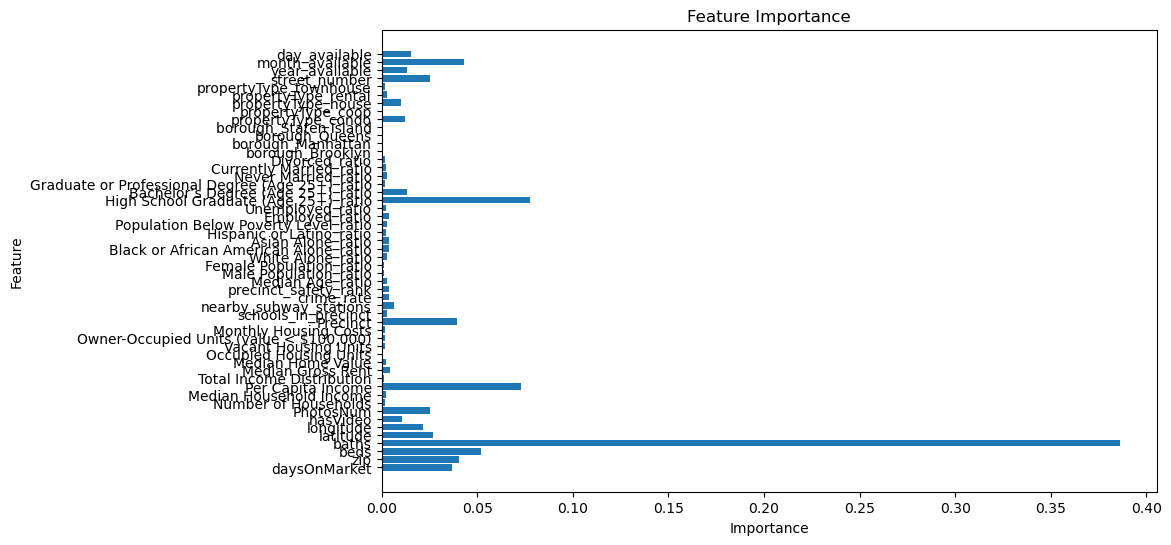

In [13]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [18]:
# for (x,y) in zip(feature_names,importances):
    

In [19]:
# Create a DataFrame to sort the feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the features by importance in descending order
sorted_features = feature_importance_df.sort_values(by='importance', ascending=False)

# Get the top 15 features
top_15_features = sorted_features.head(15)

# Print top 15 features
print("Top 15 Features based on Importance:")
print(top_15_features)

Top 15 Features based on Importance:
                                 feature  importance
3                                  baths    0.386000
33  High School Graduate (Age 25+)_ratio    0.077521
10                     Per Capita Income    0.073062
2                                   beds    0.051968
50                       month_available    0.042914
1                                    zip    0.040447
18                              Precinct    0.039341
0                           daysOnMarket    0.036973
4                               latitude    0.026773
48                         street_number    0.025549
7                              PhotosNum    0.025105
5                              longitude    0.021599
51                         day_available    0.015313
49                        year_available    0.013491
34     Bachelor’s Degree (Age 25+)_ratio    0.013455


In [27]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Assume 'df' is the dataframe with your data and 'price' is the target variable
# X = df.drop(columns=['price'])  # Features
# y = df['price']  # Target variable

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor with the best parameters
rf_regressor = RandomForestRegressor(
    max_depth=None,
    min_samples_split=5,
    n_estimators=211,
    random_state=42
)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 938.7771117300249
Mean Squared Error (MSE): 8018336.390009143
Root Mean Squared Error (RMSE): 2831.6667159129343
R-squared (R2): 0.7868223075720124
